## ROC Curves

Recall that an ROC curve takes the **ranking** of the examples from a binary classifier, and plots the **True positive rate** versus the **False positive rate**.

<img src="svm.png">

<img src="roc.jpg" width=30%>

## Problem 1:

Let's say the binary classifier produces scores $\text{scr}(\vec{x})$. We are going to prove the following fact:
$$\text{Area under the ROC curve } \quad = \quad \mathop{\text{Pr}}_{\vec{x}_+ \sim \text{ Class+}, \; \vec{x}_- \sim \text{ Class-}} (\text{scr}(\vec{x}_+) \geq \text{scr}(\vec{x}_-))$$

### Part a)
Convince yourself of the following, that we can draw the ROC curve using the following procedure:
1. Sort the $\vec{x}$'s by their score
1. Draw a blank $1 \times 1$ square
1. Put your pen on the lower lefthand corner
1. For each of the $\vec{x}$'s in the sorted list:
    1. Draw **up** a length equal to $1/\text{num pos examples}$ if the example is a **positive** example
    1. Draw **right** a length equal to $1/\text{num neg examples}$ if the example is a **negative** example

### Part b)

Now see if you can figure out WHY the statement we want to prove is true.

*Hint*: Think about how to sample a positive example and a negative example, and how that relates to the shape of the ROC curve

<img src="QY5BJ.png">

## Problem 2: Learning curves

Let's use learning curves to explore the bias / variance tradeoff. Learning curves work by plotting the training and test accuracy as a function of the amount of data the model has access to. As we learned in lecture, this helps us examine a few things:

- A large gap between training and test performance that doesn't converge with more data can indicate **high variance**; the model is overfitting the training data and not generalizing to data it hasn't seen yet (the test set)
- Curves that converge but at a level of accuracy that is unacceptable can indicate **high bias**; while variance isn't a concern, if the model isn't performing as well as we think it should on either train or test set, it may be biased


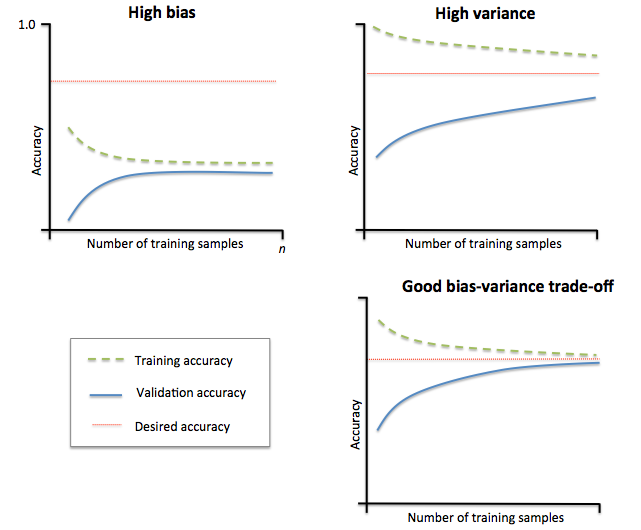

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

# image courtesy of Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.
Image(filename='learning-curve.png', width=600) 

### Plotting our own learning curves

Let's plot a learning curve for a logistic regression classifier on the trusty [iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=0)

In [4]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(model, X_train, y_train):
    # code adapted into function from ch6 of Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=X_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=10,
                                   n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='cross-validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

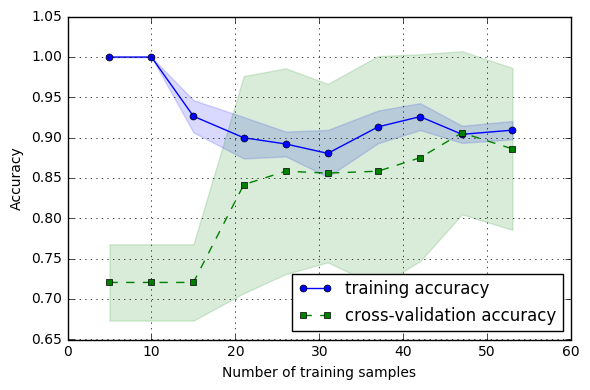

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=0))])


plot_learning_curve(pipe_lr, X_train, y_train)


Notice how we plot the standard deviation too; in addition to seeing whether the training and test accuracy converge we can see how much variation exists across the k-folds of the training runs with each sample size. This variance can in itself help us determine whether or not our model suffers from variance.

Also: a quick note on [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): they are a handy way to package preprocessing steps into an object that adheres to the fit/transform/predict paradigm of scikit-learn. Most linear models require that the data is scaled, so we use the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) pipeline step. Tree based models do not require a scaled dataset.

**Q**: How would you characterize the bias and variance of the logistic regression model?

**Exercise**: Try adjusting the inverse regularization parameter `C` of LogisticRegression to see how it affects the learning curve. Can you reduce variance?


In [6]:
# Your code goes here

**Exercise**: Try out a couple of different models (e.g [decision trees](httpm://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [random forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or [svm](http://scikit-learn.org/stable/modules/svm.html) . Can you find a model that strikes a good balance between bias and variance (e.g high performance, small gap between training and test accuracy and low variance within k-folds?)

In [7]:
# Your code goes here

## Tuning a SVM classifier for an unbalanced dataset

Let's look at how tuning the class weights of an SVM can help us better fit an imbalanced dataset.

We will create a dataset with 1000 samples with label `0` and 100 samples with label `1`.


In [8]:
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X_unbalanced = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y_unbalanced = [0] * (n_samples_1) + [1] * (n_samples_2)

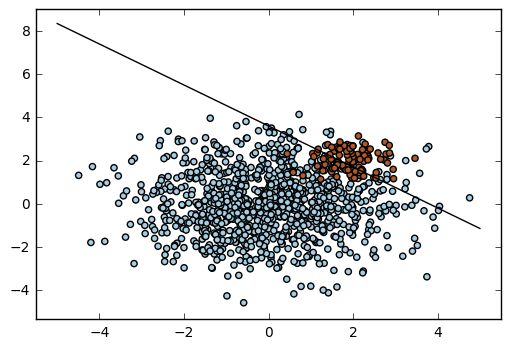

In [9]:
from sklearn import svm

# fit the model and get the separating hyperplane
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_unbalanced, y_unbalanced)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - model.intercept_[0] / w[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
plt.scatter(X_unbalanced[:, 0], X_unbalanced[:, 1], c=y_unbalanced, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()



Notice how the separating hyperplane fails to capture a high percentage of the positive examples. Assuming we wish to capture more of the positive examples, we can use the `class_weight` parameter of [svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to add more emphasis.

**Exercise**: try increasing the weight for class label `1` and see how it improves performance by plotting an updated decision boundary.

In [10]:
# Your code goes here